# Simple Linear Regression Demo

This notebook demonstrates single variable linear regression using
the relationship between hours studied and exam scores.

**Author:** Teaching Demo  
**Dataset:** linear_regression_sample.csv

## Step 1: Import Libraries

In [27]:
# ============================================================================
# IMPORT LIBRARIES
# ============================================================================

import pandas as pd                          # For data manipulation
import numpy as np                           # For numerical operations
import matplotlib.pyplot as plt              # For visualization
from sklearn.linear_model import LinearRegression  # ML model
from sklearn.metrics import r2_score, mean_squared_error  # Performance metrics

## Step 2: Load and Explore the Data

In [28]:
# ============================================================================
# LOAD AND EXPLORE THE DATA
# ============================================================================

# Load the CSV file into a pandas DataFrame
data = pd.read_csv('linear_regression_sample.csv')

# Display the first few rows to understand the data structure
print("=" * 60)
print("DATASET PREVIEW")
print("=" * 60)
print(data.head())
print(f"\nTotal number of students: {len(data)}")
print()

# Display basic statistics about the data
print("=" * 60)
print("STATISTICAL SUMMARY")
print("=" * 60)
print(data.describe())
print()

DATASET PREVIEW
   Hours_Studied  Exam_Score
0              2          55
1              3          60
2              4          65
3              5          70
4              6          75

Total number of students: 10

STATISTICAL SUMMARY
       Hours_Studied  Exam_Score
count       10.00000   10.000000
mean         6.50000   76.500000
std          3.02765   13.786064
min          2.00000   55.000000
25%          4.25000   66.250000
50%          6.50000   77.500000
75%          8.75000   87.250000
max         11.00000   95.000000



## Step 3: Prepare the Data

In [29]:
# ============================================================================
# PREPARE THE DATA
# ============================================================================

# Extract the independent variable (X) - Hours Studied
# Note: We use double brackets [[]] to keep it as a 2D array (required by sklearn)
X = data[['Hours_Studied']]

# Extract the dependent variable (y) - Exam Score
# This is what we want to predict
y = data['Exam_Score']

print("=" * 60)
print("DATA SHAPE")
print("=" * 60)
print(f"X (Hours Studied) shape: {X.shape}")  # Should be (10, 1)
print(f"y (Exam Score) shape: {y.shape}")      # Should be (10,)
print()

DATA SHAPE
X (Hours Studied) shape: (10, 1)
y (Exam Score) shape: (10,)



## Step 4: Create and Train the Model

In [30]:
# ============================================================================
# CREATE AND TRAIN THE MODEL
# ============================================================================

# Initialize the Linear Regression model
# This creates an empty model ready to learn from data
model = LinearRegression()

# Train the model using our data
# The model finds the best-fit line: y = mx + b
model.fit(X, y)

print("=" * 60)
print("MODEL PARAMETERS (The Line Equation)")
print("=" * 60)
print(f"Slope (m): {model.coef_[0]:.4f}")
print(f"  → Interpretation: Each additional hour of study increases score by {model.coef_[0]:.2f} points")
print()
print(f"Intercept (b): {model.intercept_:.4f}")
print(f"  → Interpretation: Expected score with 0 hours of study is {model.intercept_:.2f} points")
print()
print(f"Equation: Score = {model.coef_[0]:.2f} × Hours + {model.intercept_:.2f}")
print()

MODEL PARAMETERS (The Line Equation)
Slope (m): 4.5394
  → Interpretation: Each additional hour of study increases score by 4.54 points

Intercept (b): 46.9939
  → Interpretation: Expected score with 0 hours of study is 46.99 points

Equation: Score = 4.54 × Hours + 46.99



## Step 5: Make Predictions

In [31]:
# ============================================================================
# MAKE PREDICTIONS
# ============================================================================

# Use the trained model to predict scores based on hours studied
y_pred = model.predict(X)

# Display actual vs predicted values
print("=" * 60)
print("PREDICTIONS vs ACTUAL VALUES")
print("=" * 60)
print(f"{'Hours':<10} {'Actual Score':<15} {'Predicted Score':<18} {'Error (Residual)':<15}")
print("-" * 60)

for i in range(len(data)):
    hours = X.iloc[i, 0]
    actual = y.iloc[i]
    predicted = y_pred[i]
    residual = actual - predicted
    print(f"{hours:<10} {actual:<15} {predicted:<18.2f} {residual:<15.2f}")
print()

PREDICTIONS vs ACTUAL VALUES
Hours      Actual Score    Predicted Score    Error (Residual)
------------------------------------------------------------
2          55              56.07              -1.07          
3          60              60.61              -0.61          
4          65              65.15              -0.15          
5          70              69.69              0.31           
6          75              74.23              0.77           
7          80              78.77              1.23           
8          85              83.31              1.69           
9          88              87.85              0.15           
10         92              92.39              -0.39          
11         95              96.93              -1.93          



## Step 6: Evaluate Model Performance

In [23]:
# ============================================================================
# EVALUATE MODEL PERFORMANCE
# ============================================================================

# Calculate R² score (coefficient of determination)
# R² ranges from 0 to 1, where 1 means perfect predictions
r2 = r2_score(y, y_pred)

# Calculate Mean Squared Error (MSE)
# MSE measures average squared difference between actual and predicted values
mse = mean_squared_error(y, y_pred)

# Calculate Root Mean Squared Error (RMSE)
# RMSE is in the same units as our target variable (exam scores)
rmse = np.sqrt(mse)

print("=" * 60)
print("MODEL PERFORMANCE METRICS")
print("=" * 60)
print(f"R² Score: {r2:.4f}")
print(f"  → Interpretation: {r2*100:.2f}% of score variation is explained by hours studied")
print()
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"  → Interpretation: On average, predictions are off by ±{rmse:.2f} points")
print()

MODEL PERFORMANCE METRICS
R² Score: 0.9939
  → Interpretation: 99.39% of score variation is explained by hours studied

Mean Squared Error (MSE): 1.0497
Root Mean Squared Error (RMSE): 1.0245
  → Interpretation: On average, predictions are off by ±1.02 points



## Step 7: What-If Predictions (New Data)

In [24]:
# ============================================================================
# MAKE NEW PREDICTIONS (What-If Scenarios)
# ============================================================================

print("=" * 60)
print("WHAT-IF PREDICTIONS (New Data)")
print("=" * 60)

# Test with new values not in the original dataset
new_hours = np.array([[6.5], [8.5], [12]])

# Make predictions for these new values
new_predictions = model.predict(new_hours)

print(f"{'Hours Studied':<20} {'Predicted Score':<20}")
print("-" * 40)
for hours, score in zip(new_hours, new_predictions):
    print(f"{hours[0]:<20} {score:<20.2f}")
print()

# Warning about extrapolation
print("⚠️  Note: Predictions for 12 hours (outside our data range of 2-11)")
print("   may be less reliable due to extrapolation.")
print()

WHAT-IF PREDICTIONS (New Data)
Hours Studied        Predicted Score     
----------------------------------------
6.5                  76.50               
8.5                  85.58               
12.0                 101.47              

⚠️  Note: Predictions for 12 hours (outside our data range of 2-11)
   may be less reliable due to extrapolation.



/home/kofi-eli/PycharmProjects/MLclass/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## Step 8: Visualize the Results

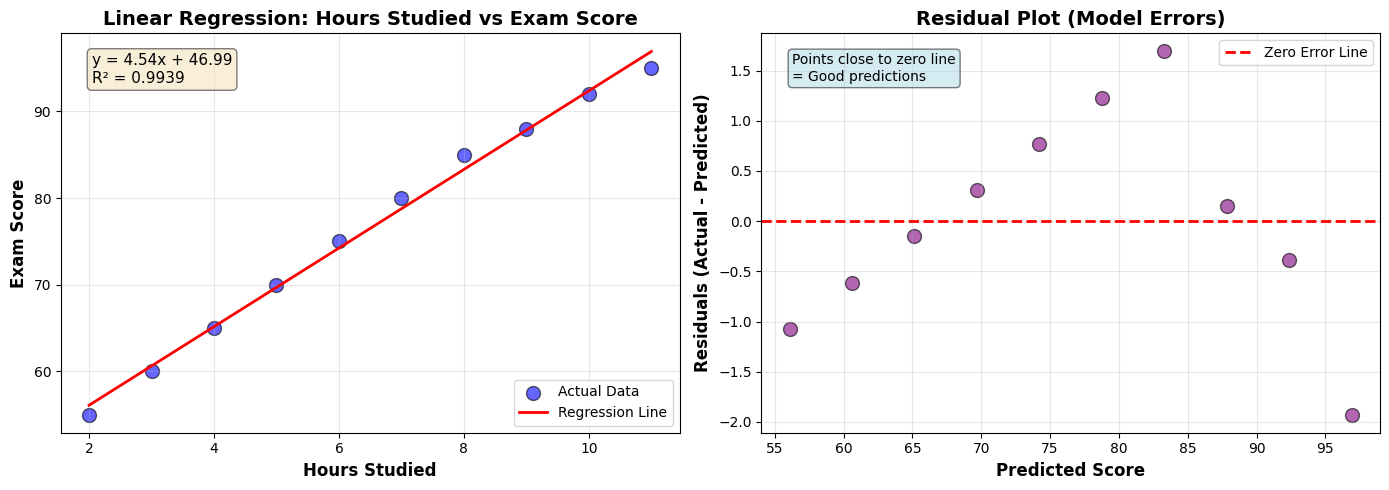

In [25]:
# ============================================================================
# VISUALIZE THE RESULTS
# ============================================================================

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# --- SUBPLOT 1: Scatter plot with regression line ---
axes[0].scatter(X, y, color='blue', s=100, alpha=0.6, label='Actual Data', edgecolors='black')
axes[0].plot(X, y_pred, color='red', linewidth=2, label='Regression Line')

# Add labels and title
axes[0].set_xlabel('Hours Studied', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Exam Score', fontsize=12, fontweight='bold')
axes[0].set_title('Linear Regression: Hours Studied vs Exam Score', fontsize=14, fontweight='bold')
axes[0].legend(fontsize=10)
axes[0].grid(True, alpha=0.3)

# Add the equation to the plot
equation_text = f'y = {model.coef_[0]:.2f}x + {model.intercept_:.2f}\nR² = {r2:.4f}'
axes[0].text(0.05, 0.95, equation_text, transform=axes[0].transAxes,
             fontsize=11, verticalalignment='top',
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# --- SUBPLOT 2: Residual plot ---
# Residuals show the errors (difference between actual and predicted)
residuals = y - y_pred

axes[1].scatter(y_pred, residuals, color='purple', s=100, alpha=0.6, edgecolors='black')
axes[1].axhline(y=0, color='red', linestyle='--', linewidth=2, label='Zero Error Line')

# Add labels and title
axes[1].set_xlabel('Predicted Score', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Residuals (Actual - Predicted)', fontsize=12, fontweight='bold')
axes[1].set_title('Residual Plot (Model Errors)', fontsize=14, fontweight='bold')
axes[1].legend(fontsize=10)
axes[1].grid(True, alpha=0.3)

# Add interpretation note
axes[1].text(0.05, 0.95, 'Points close to zero line\n= Good predictions',
             transform=axes[1].transAxes, fontsize=10,
             verticalalignment='top',
             bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()

## Step 9: Interactive Prediction Function

In [26]:
# ============================================================================
# INTERACTIVE PREDICTION FUNCTION
# ============================================================================

def predict_score(hours):
    """
    Predict exam score based on hours studied.
    
    Parameters:
    -----------
    hours : float or int
        Number of hours studied
    
    Returns:
    --------
    float
        Predicted exam score
    """
    # Reshape input to 2D array format required by the model
    hours_array = np.array([[hours]])
    
    # Make prediction
    predicted_score = model.predict(hours_array)[0]
    
    return predicted_score

# Example usage
print("\n" + "=" * 60)
print("INTERACTIVE PREDICTION FUNCTION")
print("=" * 60)
print("You can now use predict_score(hours) to predict any score!")
print()
print("Examples:")
print(f"  predict_score(5) = {predict_score(5):.2f}")
print(f"  predict_score(7.5) = {predict_score(7.5):.2f}")
print(f"  predict_score(10) = {predict_score(10):.2f}")
print("=" * 60)


INTERACTIVE PREDICTION FUNCTION
You can now use predict_score(hours) to predict any score!

Examples:
  predict_score(5) = 69.69
  predict_score(7.5) = 81.04
  predict_score(10) = 92.39


/home/kofi-eli/PycharmProjects/MLclass/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/kofi-eli/PycharmProjects/MLclass/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/kofi-eli/PycharmProjects/MLclass/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
